# Comparacion de los diferentes metodos del machine learning

# Random Forest


## Librerias usadas

In [114]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sb


## Dataset Titanic 

In [115]:
data_train = pd.read_csv("train.csv")
data_train 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [116]:
data_test = pd.read_csv("test.csv")
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


## Descripcion del dataset

Los datos se han dividido en dos grupos

Conjunto de entrenamiento (train.csv)


Conjunto de prueba (test.csv)


El conjunto de entrenamiento debe utilizarse para construir los modelos de aprendizaje automático, para el conjunto de entrenamiento, proporcionamos el resultado (también conocido como la "verdad básica") para cada pasajero. Su modelo se basará en "características" como el género y la clase de los pasajeros. También puede utilizar la ingeniería de características para crear otras nuevas.

El conjunto de pruebas debe utilizarse para comprobar el rendimiento de su modelo con datos no vistos. Para el conjunto de pruebas, no proporcionamos la verdad sobre el terreno para cada pasajero. Es su trabajo predecir estos resultados. Para cada pasajero del conjunto de prueba, utiliza el modelo que has entrenado para predecir si sobrevivieron o no al hundimiento del Titanic.


## Significado de cada columna

| Variable |                 Definition                 | Key                                            |
|----------|:------------------------------------------:|------------------------------------------------|
| survival |                  Survival                  | 0 = No, 1 = Yes                                |
| pclass   |                Ticket class                | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      |                     Sex                    |                                                |
| Age      |                Age in years                |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   |                Ticket number               |                                                |
| fare     |               Passenger fare               |                                                |
| cabin    |                Cabin number                |                                                |
| embarked |             Port of Embarkation            | C = Cherbourg, Q = Queenstown, S = Southampton |

pclass: Una aproximación al estatus socioeconómico (SES)

1. Superior
2. Medio
3. Baja

edad: La edad es fraccionaria si es inferior a 1. Si se estima la edad, es en forma de xx.5

sibsp: El conjunto de datos define las relaciones familiares de esta manera...

- Hermano = hermano, hermana, hermanastro, hermanastra

- Cónyuge = marido, mujer (se han ignorado las amantes y los prometidos)

parch: El conjunto de datos define las relaciones familiares de esta manera...

- Padre = madre, padre

- Hijo = hija, hijo, hijastra, hijastro

- Algunos niños viajaron sólo con una niñera, por lo que parch=0 para ellos.

# Datos nulos

In [117]:
print(data_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [118]:
print(data_test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64


En el momento de utilizar esta tabla se nos menciona que hay datos que no se pudieron confirmar y por lo tanto fueron descritos como valores nulos en la tabla

Para este trabajo es necesario rellenar estos datos nulos, como podemos observar en las celdas anteriores, el valor con mas datos nulos son las cabinas y las edades, luego de estos dos puntos hay algunas columnas a las cuales les faltan uno o dos datos.

# Datos faltantes

Iniciamos con las columnas con menos valores faltantes, estas son embarcados en data_train y Fare en data_test

In [119]:
data_train.loc[data_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Si checamos los datos en internet de los nombres podemos encontrar que las dos personas embarcaron en  Southampton

In [120]:
data_train['Embarked'] = data_train['Embarked'].fillna('S')

Para este caso es necesario hacer un mayor analisis de datos, pues el valor de los Fare nos va a indicar el valor de la cabina y en que clase se encontraba dentro del Titanic

In [121]:
data_test.loc[data_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0


In [122]:
low_class = data_test.loc[data_test['Pclass'] == 3]
low_class

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,1
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


Para decidir este valor usaremos el valor medio de las tarifas de las personas de clase mas baja

In [123]:
 mean = np.around(low_class["Fare"].mean(), 1)
 mean

12.5

In [124]:
data_test['Fare'] = data_test['Fare'].fillna(mean)

# Numerizacion de datos

Numerizamos los datos que tenemos esto se realiza para genero y lugar de embarcacion.

Debido a que estamos trabajando con dos csv uno de entrenamiento y uno de testeo, debemos de aplicar el mismo metodo para las dos tablas

## Genero

In [125]:
genders = {"male": 0, "female": 1}
data = [data_train, data_test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [126]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S,0


## Lugar de embarcacion

In [127]:
ports = {"S": 0, "C": 1, "Q": 2}

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1


In [128]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,0
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,0,0


## Edades

Las edades forman parte del primer grupo de valores criticos faltantes, pues estas pueden identificar las posibilidades de supervivencia que tuvo una perosna despeues del hundimiento del Titanic.

Uno de los metodos mas simples serian la utilizacion del valor medio en general para toda la tabla pero esto no nos permite identificar la relacion  entre las difernetes clases sociales, por lo tanto se va  hacer la division por medio las clases sociales usando las medias de cada una

In [129]:
def ages_slicer(data, eco_class):
    data_div = data.loc[data['Pclass'] == eco_class]
    mean = np.around(data_div["Age"].mean(), 1)
    return mean

In [130]:
def age_filler(data, mean_age_high, mean_age_middle, mean_age_low):
    Ages_fill = np.zeros(len(data))

    for i in range(len(data)):
        if np.isnan(data['Age'][i]) :
            if data['Pclass'][i] == 1:
                Ages_fill[i] = mean_age_high
            elif  data['Pclass'][i] == 2:
                Ages_fill[i] = mean_age_middle
            else: 
                Ages_fill[i] = mean_age_low
        else:
            Ages_fill[i] = data['Age'][i]
    
    return Ages_fill

In [131]:
mean_age_high = ages_slicer(data_train, 1)

mean_age_middle = ages_slicer(data_train, 2)

mean_age_low = ages_slicer(data_train, 3)

print(mean_age_high, mean_age_middle, mean_age_low)

data_train['Age'] = age_filler(data_train, mean_age_high, mean_age_middle, mean_age_low)

data_train

38.2 29.9 25.1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,25.1,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1


In [132]:
mean_age_high = ages_slicer(data_test, 1)

mean_age_middle = ages_slicer(data_test, 2)

mean_age_low = ages_slicer(data_test, 3)

print(mean_age_high, mean_age_middle, mean_age_low)

data_test['Age'] = age_filler(data_test, mean_age_high, mean_age_middle, mean_age_low)

data_test

40.9 28.8 24.0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,24.0,0,0,A.5. 3236,8.0500,NaN,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,0
416,1308,3,"Ware, Mr. Frederick",0,24.0,0,0,359309,8.0500,NaN,0,0


# Cabin

El valor de la serie  de la cabina es en si un valor no tan util, pues a diferencia de la creencia comun, la distribucion de las clases de cabinas, no esta dada de manera jerarquicamente estructural, esto lo podemos observar en la siguiente imagen.

 ![Titanic](titanic_class_cabin_locations.png)

 Donde podemos observar que la gran mayoria de las cabinas de primera clase, estan en el centro del Titanic, estando muchas mas ceerca a los botes salvavidas.

 Por lo tanto se decidio reemplazar este valor por un valor mas adecuado, el numero de la clase de cabinas, esto va a ser dado por los valores mas comunmente acpetado de los precios de las [cabinas del Titanic](https://titanicfacts.net/life-on-the-titanic/).

 

In [133]:
cabin_class = np.zeros(len(data_train))

for i in range(len(data_train)):
    if data_train['Fare'][i] >= 150:
        cabin_class[i] = 1
    elif data_train['Fare'][i] < 150 and data_train['Fare'][i] >= 40: 
        cabin_class[i] = 2
    elif data_train['Fare'][i] < 40:
        cabin_class[i] = 3
data_train['Cabin'] = cabin_class
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,3.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2.0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,3.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2.0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,3.0,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,3.0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,25.1,1,2,W./C. 6607,23.4500,3.0,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,3.0,1


In [134]:
cabin_class = np.zeros(len(data_test))

for i in range(len(data_test)):
    if data_test['Fare'][i] >= 150:
        cabin_class[i] = 1
    elif data_test['Fare'][i] < 150 and data_test['Fare'][i] >= 40: 
        cabin_class[i] = 2
    elif data_test['Fare'][i] < 40:
        cabin_class[i] = 3
data_test['Cabin'] = cabin_class
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,3.0,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,3.0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,3.0,2,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,3.0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,3.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,24.0,0,0,A.5. 3236,8.0500,3.0,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,2.0,1,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,3.0,0,0
416,1308,3,"Ware, Mr. Frederick",0,24.0,0,0,359309,8.0500,3.0,0,0


# Niños

Agregamos una columna de niños para observar si al estar en este grupo de edades las posibiliades de sobrevivir aumentaban

In [135]:
child_column_train = np.zeros(len(data_train))

for i in range(len(data_train)):
    if data_train['Age'][i] <= 15:
        child_column_train[i] = 1
    else:
        child_column_train[i] = 0

data_train['child'] = child_column_train
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,child
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,3.0,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2.0,1,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,3.0,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2.0,0,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,3.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,3.0,0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,3.0,0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,25.1,1,2,W./C. 6607,23.4500,3.0,0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,3.0,1,0.0


In [136]:
child_column_train = np.zeros(len(data_test))

for i in range(len(data_test)):
    if data_test['Age'][i] <= 15:
        child_column_train[i] = 1
    else:
        child_column_train[i] = 0

data_test['child'] = child_column_train
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,child
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,3.0,2,0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,3.0,0,1,0.0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,3.0,2,0,0.0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,3.0,0,0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,3.0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,24.0,0,0,A.5. 3236,8.0500,3.0,0,0,0.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,2.0,1,1,0.0
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,3.0,0,0,0.0
416,1308,3,"Ware, Mr. Frederick",0,24.0,0,0,359309,8.0500,3.0,0,0,0.0


In [137]:
print(data_train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
child          0
dtype: int64


In [138]:
print(data_test.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
child          0
dtype: int64


# Con esto finalizamos el analisis de datos y pasamos a relaizar la experimentacion

## Cargamos los valores de entrenamiento y nos deshacemos de algunos valores no necesarios

In [139]:
x_train = data_train.drop((['Name', 'Ticket', 'PassengerId']), axis=1)
x_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,child
0,0,3,0,22.0,1,0,7.2500,3.0,0,0.0
1,1,1,1,38.0,1,0,71.2833,2.0,1,0.0
2,1,3,1,26.0,0,0,7.9250,3.0,0,0.0
3,1,1,1,35.0,1,0,53.1000,2.0,0,0.0
4,0,3,0,35.0,0,0,8.0500,3.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,3.0,0,0.0
887,1,1,1,19.0,0,0,30.0000,3.0,0,0.0
888,0,3,1,25.1,1,2,23.4500,3.0,0,0.0
889,1,1,0,26.0,0,0,30.0000,3.0,1,0.0


In [140]:
x_test = data_test.drop((['Name', 'Ticket', 'PassengerId', 'Survived']), axis=1)
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,child
0,3,0,34.5,0,0,7.8292,3.0,2,0.0
1,3,1,47.0,1,0,7.0000,3.0,0,0.0
2,2,0,62.0,0,0,9.6875,3.0,2,0.0
3,3,0,27.0,0,0,8.6625,3.0,0,0.0
4,3,1,22.0,1,1,12.2875,3.0,0,0.0
...,...,...,...,...,...,...,...,...,...
413,3,0,24.0,0,0,8.0500,3.0,0,0.0
414,1,1,39.0,0,0,108.9000,2.0,1,0.0
415,3,0,38.5,0,0,7.2500,3.0,0,0.0
416,3,0,24.0,0,0,8.0500,3.0,0,0.0


## Antes de deshacernos del label Survived, aprovechamos a crear un cuadro de calor que nos muestre la relacion enre los diferentes valores existentes.

<AxesSubplot:>

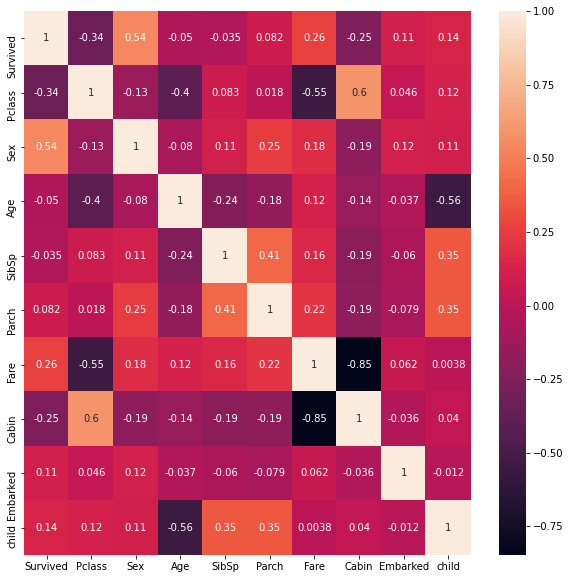

In [141]:
fig, ax = plt.subplots(figsize=(10,10))   
sb.heatmap(x_train.corr(), annot=True, ax= ax)

In [142]:
x_train = x_train.drop('Survived', axis=1)
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,child
0,3,0,22.0,1,0,7.2500,3.0,0,0.0
1,1,1,38.0,1,0,71.2833,2.0,1,0.0
2,3,1,26.0,0,0,7.9250,3.0,0,0.0
3,1,1,35.0,1,0,53.1000,2.0,0,0.0
4,3,0,35.0,0,0,8.0500,3.0,0,0.0
...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,3.0,0,0.0
887,1,1,19.0,0,0,30.0000,3.0,0,0.0
888,3,1,25.1,1,2,23.4500,3.0,0,0.0
889,1,0,26.0,0,0,30.0000,3.0,1,0.0


In [143]:
y_train = data_train['Survived']
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [144]:
y_test = data_test['Survived']
y_test

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

# Clasificacion

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

In [146]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,child
0,3,0,22.0,1,0,7.2500,3.0,0,0.0
1,1,1,38.0,1,0,71.2833,2.0,1,0.0
2,3,1,26.0,0,0,7.9250,3.0,0,0.0
3,1,1,35.0,1,0,53.1000,2.0,0,0.0
4,3,0,35.0,0,0,8.0500,3.0,0,0.0
...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,3.0,0,0.0
887,1,1,19.0,0,0,30.0000,3.0,0,0.0
888,3,1,25.1,1,2,23.4500,3.0,0,0.0
889,1,0,26.0,0,0,30.0000,3.0,1,0.0


## Inicialmente usamos el MinMaxScaler para reescalar todos los valores entre 0 y 3

In [147]:
scaler = MinMaxScaler((0,3))

In [148]:
scaled_data =  scaler.fit(x_train).transform(x_train)
scaled_data

array([[3.        , 0.        , 0.81352099, ..., 3.        , 0.        ,
        0.        ],
       [0.        , 3.        , 1.41668761, ..., 1.5       , 1.5       ,
        0.        ],
       [3.        , 3.        , 0.96431264, ..., 3.        , 0.        ,
        0.        ],
       ...,
       [3.        , 3.        , 0.93038452, ..., 3.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.96431264, ..., 3.        , 1.5       ,
        0.        ],
       [3.        , 0.        , 1.19050013, ..., 3.        , 3.        ,
        0.        ]])

## Usaremos GridSearchCV para encontrar los mejores tipos de parametros que podemos usar en el random forest

Para ello vamos a usar una serie de parametros que nosotros especificamos:

- 'n_estimators'
- 'max_depth' 
- 'min_samples_split' 
- 'min_samples_leaf' 
- 'max_features' 
 Inicilamente usamos:

 paramaters = {
     
              'n_estimators' : [10,200,400,600,800,1000],

              'max_depth' : [1, 5, 10, 15],

              'min_samples_split' : [2,4,6],

              'min_samples_leaf' : [1,2,4,6],

              'max_features' : ['auto', 'sqrt', 'log2']
              
             } 
              

Y nos dio que:

![Iter_1](fist_iter_param.PNG)


Y con ello podemos indicar que el valor de 400 y de 10  son mejores para este modelo, ya que estos valores no se encuentran entre las puntas de parametros, ademas el metodo auto es el mejor para el max_features. 

Si aplicamos  los parametros:

paramaters = {
              'min_samples_split' : [0.5,0.75,2],
              'min_samples_leaf' : [0.5 ,2, 3]
              }
Nos da que:

![Iter_2](sec_iter_param.PNG)
        
Para la tercera iteracion nos dio que:

In [149]:
paramaters = {'min_samples_split' : [2, 3, 4],
              'min_samples_leaf' : [1,2,3, 4]}

In [150]:
random_forest = RandomForestClassifier(random_state= 42, n_jobs= -1, max_depth= 10, n_estimators= 400, max_features= 'auto')

In [151]:
rf_gridSearch = GridSearchCV(estimator= random_forest, param_grid= paramaters, cv=3, verbose= 2)

In [152]:
rf_gridSearch.fit(x_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ............min_samples_leaf=1, min_samples_split=2; total time=   3.8s
[CV] END ............min_samples_leaf=1, min_samples_split=2; total time=   0.5s
[CV] END ............min_samples_leaf=1, min_samples_split=2; total time=   0.5s
[CV] END ............min_samples_leaf=1, min_samples_split=3; total time=   0.6s
[CV] END ............min_samples_leaf=1, min_samples_split=3; total time=   0.5s
[CV] END ............min_samples_leaf=1, min_samples_split=3; total time=   0.5s
[CV] END ............min_samples_leaf=1, min_samples_split=4; total time=   0.5s
[CV] END ............min_samples_leaf=1, min_samples_split=4; total time=   0.5s
[CV] END ............min_samples_leaf=1, min_samples_split=4; total time=   0.5s
[CV] END ............min_samples_leaf=2, min_samples_split=2; total time=   0.5s
[CV] END ............min_samples_leaf=2, min_samples_split=2; total time=   0.5s
[CV] END ............min_samples_leaf=2, min_sam

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=10, n_estimators=400,
                                              n_jobs=-1, random_state=42),
             param_grid={'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4]},
             verbose=2)

In [153]:
rf_gridSearch.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2}

In [154]:
rf_gridSearch.best_score_

0.8271604938271605

#Por lo tanto podemos decidir que los mejores parametros para este modelo son:

 paramaters = {
     
              'n_estimators' : 400,

              'max_depth' :10,

              'min_samples_split' : 2,

              'min_samples_leaf' : 1,

              'max_features' : 'auto'
              
             } 

# Testeo y prediccion

Al momento de realizar el testeo y la prediccion con el mejor modelo que tenemos nos dio que:

In [155]:
y_pred = rf_gridSearch.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Si hacemos el reporte de precicision obtenememos que:

In [172]:
print(classification_report(y_test, y_pred,target_names= class_names) )


               precision    recall  f1-score   support

No sobrevivio       0.87      0.91      0.89       266
   Sobrevivio       0.83      0.76      0.79       152

     accuracy                           0.86       418
    macro avg       0.85      0.84      0.84       418
 weighted avg       0.86      0.86      0.85       418



## Como conocemos los valores reales de nuestras tablas, podmeos hacer una confusion matrix y mostrar los valores que fueron predichos de manera correcta

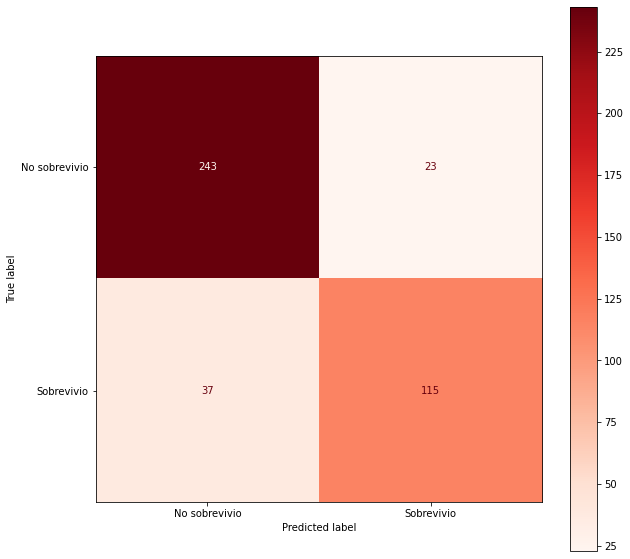

In [156]:
class_names = ['No sobrevivio', 'Sobrevivio']
fig, ax = plt.subplots(figsize=(10,10))  
plot_confusion_matrix(rf_gridSearch, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Reds,
                                 normalize=None,
                                 ax= ax)

# Finalmente visualizamos la tabla final con nuestras predicciones

In [161]:
displ_table = x_test
displ_table['y_pred'] =y_pred 

In [162]:
displ_table

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,child,y_pred
0,3,0,34.5,0,0,7.8292,3.0,2,0.0,0
1,3,1,47.0,1,0,7.0000,3.0,0,0.0,0
2,2,0,62.0,0,0,9.6875,3.0,2,0.0,0
3,3,0,27.0,0,0,8.6625,3.0,0,0.0,0
4,3,1,22.0,1,1,12.2875,3.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
413,3,0,24.0,0,0,8.0500,3.0,0,0.0,0
414,1,1,39.0,0,0,108.9000,2.0,1,0.0,1
415,3,0,38.5,0,0,7.2500,3.0,0,0.0,0
416,3,0,24.0,0,0,8.0500,3.0,0,0.0,0


# La realidad contra la ficcion

>Si viajabas en primera clase es probable que vivas, mientras que si eres un pasajero de tercera clase es probable que perezcas y 87% fue el porcentaje de mujeres de la tripulación que sobrevivieron. 

Esto es meniconaod en [Sobrevivientes](https://titanicfacts.net/titanic-survivors/).

Por lo tanto vamos a observar si nuestra prediccion consiguio obtner estas dos tendencias

In [171]:
displ_table.groupby(['Cabin', 'y_pred']).size()

Cabin  y_pred
1.0    0           7
       1          15
2.0    0          33
       1          33
3.0    0         240
       1          90
dtype: int64

Esta tabla de datos se puede interpretar de la siguiente manera:

los valores
- 1.0
- 2.0 
- 3.0

son los valores del tipo de clase de las cabina

los valores 

- 0
- 1

Es si  sobreviviste o no

Y el tercer grupo de valores cuantos estan en cada categoria

Por lo tanto podmeos observar que con respecto a mi prediccion que el 68% de los pasajeros de primera clase sobrevivieron, mientras que el 27% de la tercera clase sobrevivieron. Esto se corresponde con la informacion ya exsitente del Titanic


In [170]:
displ_table.groupby(['Sex', 'y_pred']).size()

Sex  y_pred
0    0         243
     1          23
1    0          37
     1         115
dtype: int64

Esta tabla de datos se puede interpretar de la siguiente manera:

los valores
- 1
- 2

son los valores del genero, es decir hombre o mujer

los valores 

- 0
- 1

Es si  sobreviviste o no

Y el tercer grupo de valores cuantos estan en cada categoria

Por lo tanto podmeos observar que con respecto a mi prediccion que el8.6% de los pasajeros varones sobrevivieron, mientras que el 75.6% de las mujeres sobrevivieron. Esto se corresponde con la informacion ya exsitente del Titanic
